In [1]:
### 패키지 설치

import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc #garbage collector

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools #웹 시각화 라이브러리인 d3.js 를 이용하여 보다 interactive 하게 그래프를 만들어주는 모듈.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #TfidVectorizer: Term Frequency-Inverse Document Frequency(단어 빈도- 역문서 빈도)
from sklearn.decomposition import TruncatedSVD #특이값 분해(Singular Value Decomposition, SVD)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import plotly.graph_objs as go

import time
import random


In [2]:
data = pd.read_excel('2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx')

In [3]:
data.columns = ['홍수사상번호', '연', '월', '일', '시간', '유입량', '유역평균강수_1', '강우(A지역)_1', '강우(B지역)_1', '강우(C지역)_1','강우(D지역)_1', '수위(E지역)_1', '수위(D지역)_1',
               '유역평균강수_2', '강우(A지역)_2', '강우(B지역)_2', '강우(C지역)_2','강우(D지역)_2', '수위(E지역)_2', '수위(D지역)_2',
                '유역평균강수_3', '강우(A지역)_3', '강우(B지역)_3', '강우(C지역)_3','강우(D지역)_3', '수위(E지역)_3', '수위(D지역)_3',
                '유역평균강수_4', '강우(A지역)_4', '강우(B지역)_4', '강우(C지역)_4','강우(D지역)_4', '수위(E지역)_4', '수위(D지역)_4',
                '유역평균강수_5', '강우(A지역)_5', '강우(B지역)_5', '강우(C지역)_5','강우(D지역)_5', '수위(E지역)_5', '수위(D지역)_5',
                '유역평균강수_6', '강우(A지역)_6', '강우(B지역)_6', '강우(C지역)_6','강우(D지역)_6', '수위(E지역)_6', '수위(D지역)_6',
               ]

In [4]:
data = data.drop([0])

In [5]:
data

,홍수사상번호,연,월,일,시간,유입량,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6
1,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,8,2.54,122.569,6.3,7,7,7,8,2.54,122.542,6.3,7,7,7,8,2.54,122.55,6.4,7,7,8,8,2.54,122.675,6.4,7,7,8,8,2.54,122.66,6.4,7,7,8,8,2.54,122.61
2,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,8,2.53,122.562,6.4,7,8,7,8,2.53,122.55,6.4,7,8,7,8,2.53,122.558,7.3,7,8,10,10,2.53,122.668,7.3,7,8,10,10,2.53,122.648,7.3,7,8,10,10,2.53,122.6
3,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,8,2.53,122.556,7.3,7,9,7,8,2.53,122.558,7.3,7,9,8,8,2.53,122.567,8.2,7,9,10,11,2.53,122.661,8.2,7,9,10,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59
4,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3,7,10,7,8,2.53,122.556,8.2,7,10,8,8,2.53,122.567,8.2,7,10,10,10,2.53,122.575,11.3,9,10,15,14,2.53,122.654,11.3,9,10,15,14,2.53,122.62,11.3,9,10,15,14,2.53,122.585
5,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2,7,12,8,10,2.53,122.556,11.3,9,12,10,10,2.53,122.575,11.3,9,12,10,11,2.53,122.575,14.4,12,12,18,16,2.53,122.639,14.4,12,12,18,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,26.0,2018.0,7.0,7.0,17.0,NaN,2.3689,1,0,0,0,3.16,129.994,2.3689,1,0,0,0,3.16,130.017,2.3689,1,0,0,0,3.16,130.025,2.3689,1,0,1,0,3.16,129.882,2.3689,1,0,1,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.95
3048,26.0,2018.0,7.0,7.0,18.0,NaN,2.3689,1,0,0,0,3.15,130.006,2.3689,1,0,0,0,3.15,130.025,2.3689,1,0,0,0,3.15,130.025,2.3689,1,0,1,0,3.15,129.896,2.3689,1,0,1,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.97
3049,26.0,2018.0,7.0,7.0,19.0,NaN,2.3689,1,0,0,0,3.13,130.012,2.3689,1,0,0,0,3.13,130.025,2.3689,1,0,0,0,3.13,130.025,2.3689,1,0,1,0,3.13,129.911,2.3689,1,0,1,0,3.13,129.94,2.0354,1,0,0,0,3.13,129.98
3050,26.0,2018.0,7.0,7.0,20.0,NaN,2.3689,1,0,0,0,3.11,130.019,2.3689,1,0,0,0,3.11,130.025,2.3689,1,0,0,0,3.11,130.025,2.3689,1,0,1,0,3.11,129.925,2.3488,1,0,1,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.99


In [6]:
data = data.astype('float64')

In [7]:
data['연'] = data['연'].astype('int')
data['월'] = data['월'].astype('int')
data['일'] = data['일'].astype('int')
data['시간'] = data['시간'].astype('int')

In [8]:
test = data.iloc[2891:,:]

In [9]:
train = data.iloc[:2891,:]

In [10]:
heatmap_data = train[['유입량', '유역평균강수_1', '강우(A지역)_1', '강우(B지역)_1', '강우(C지역)_1','강우(D지역)_1', '수위(E지역)_1', '수위(D지역)_1',
               '유역평균강수_2', '강우(A지역)_2', '강우(B지역)_2', '강우(C지역)_2','강우(D지역)_2', '수위(E지역)_2', '수위(D지역)_2',
                '유역평균강수_3', '강우(A지역)_3', '강우(B지역)_3', '강우(C지역)_3','강우(D지역)_3', '수위(E지역)_3', '수위(D지역)_3',
                '유역평균강수_4', '강우(A지역)_4', '강우(B지역)_4', '강우(C지역)_4','강우(D지역)_4', '수위(E지역)_4', '수위(D지역)_4',
                '유역평균강수_5', '강우(A지역)_5', '강우(B지역)_5', '강우(C지역)_5','강우(D지역)_5', '수위(E지역)_5', '수위(D지역)_5',
                '유역평균강수_6', '강우(A지역)_6', '강우(B지역)_6', '강우(C지역)_6','강우(D지역)_6', '수위(E지역)_6', '수위(D지역)_6',]]

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


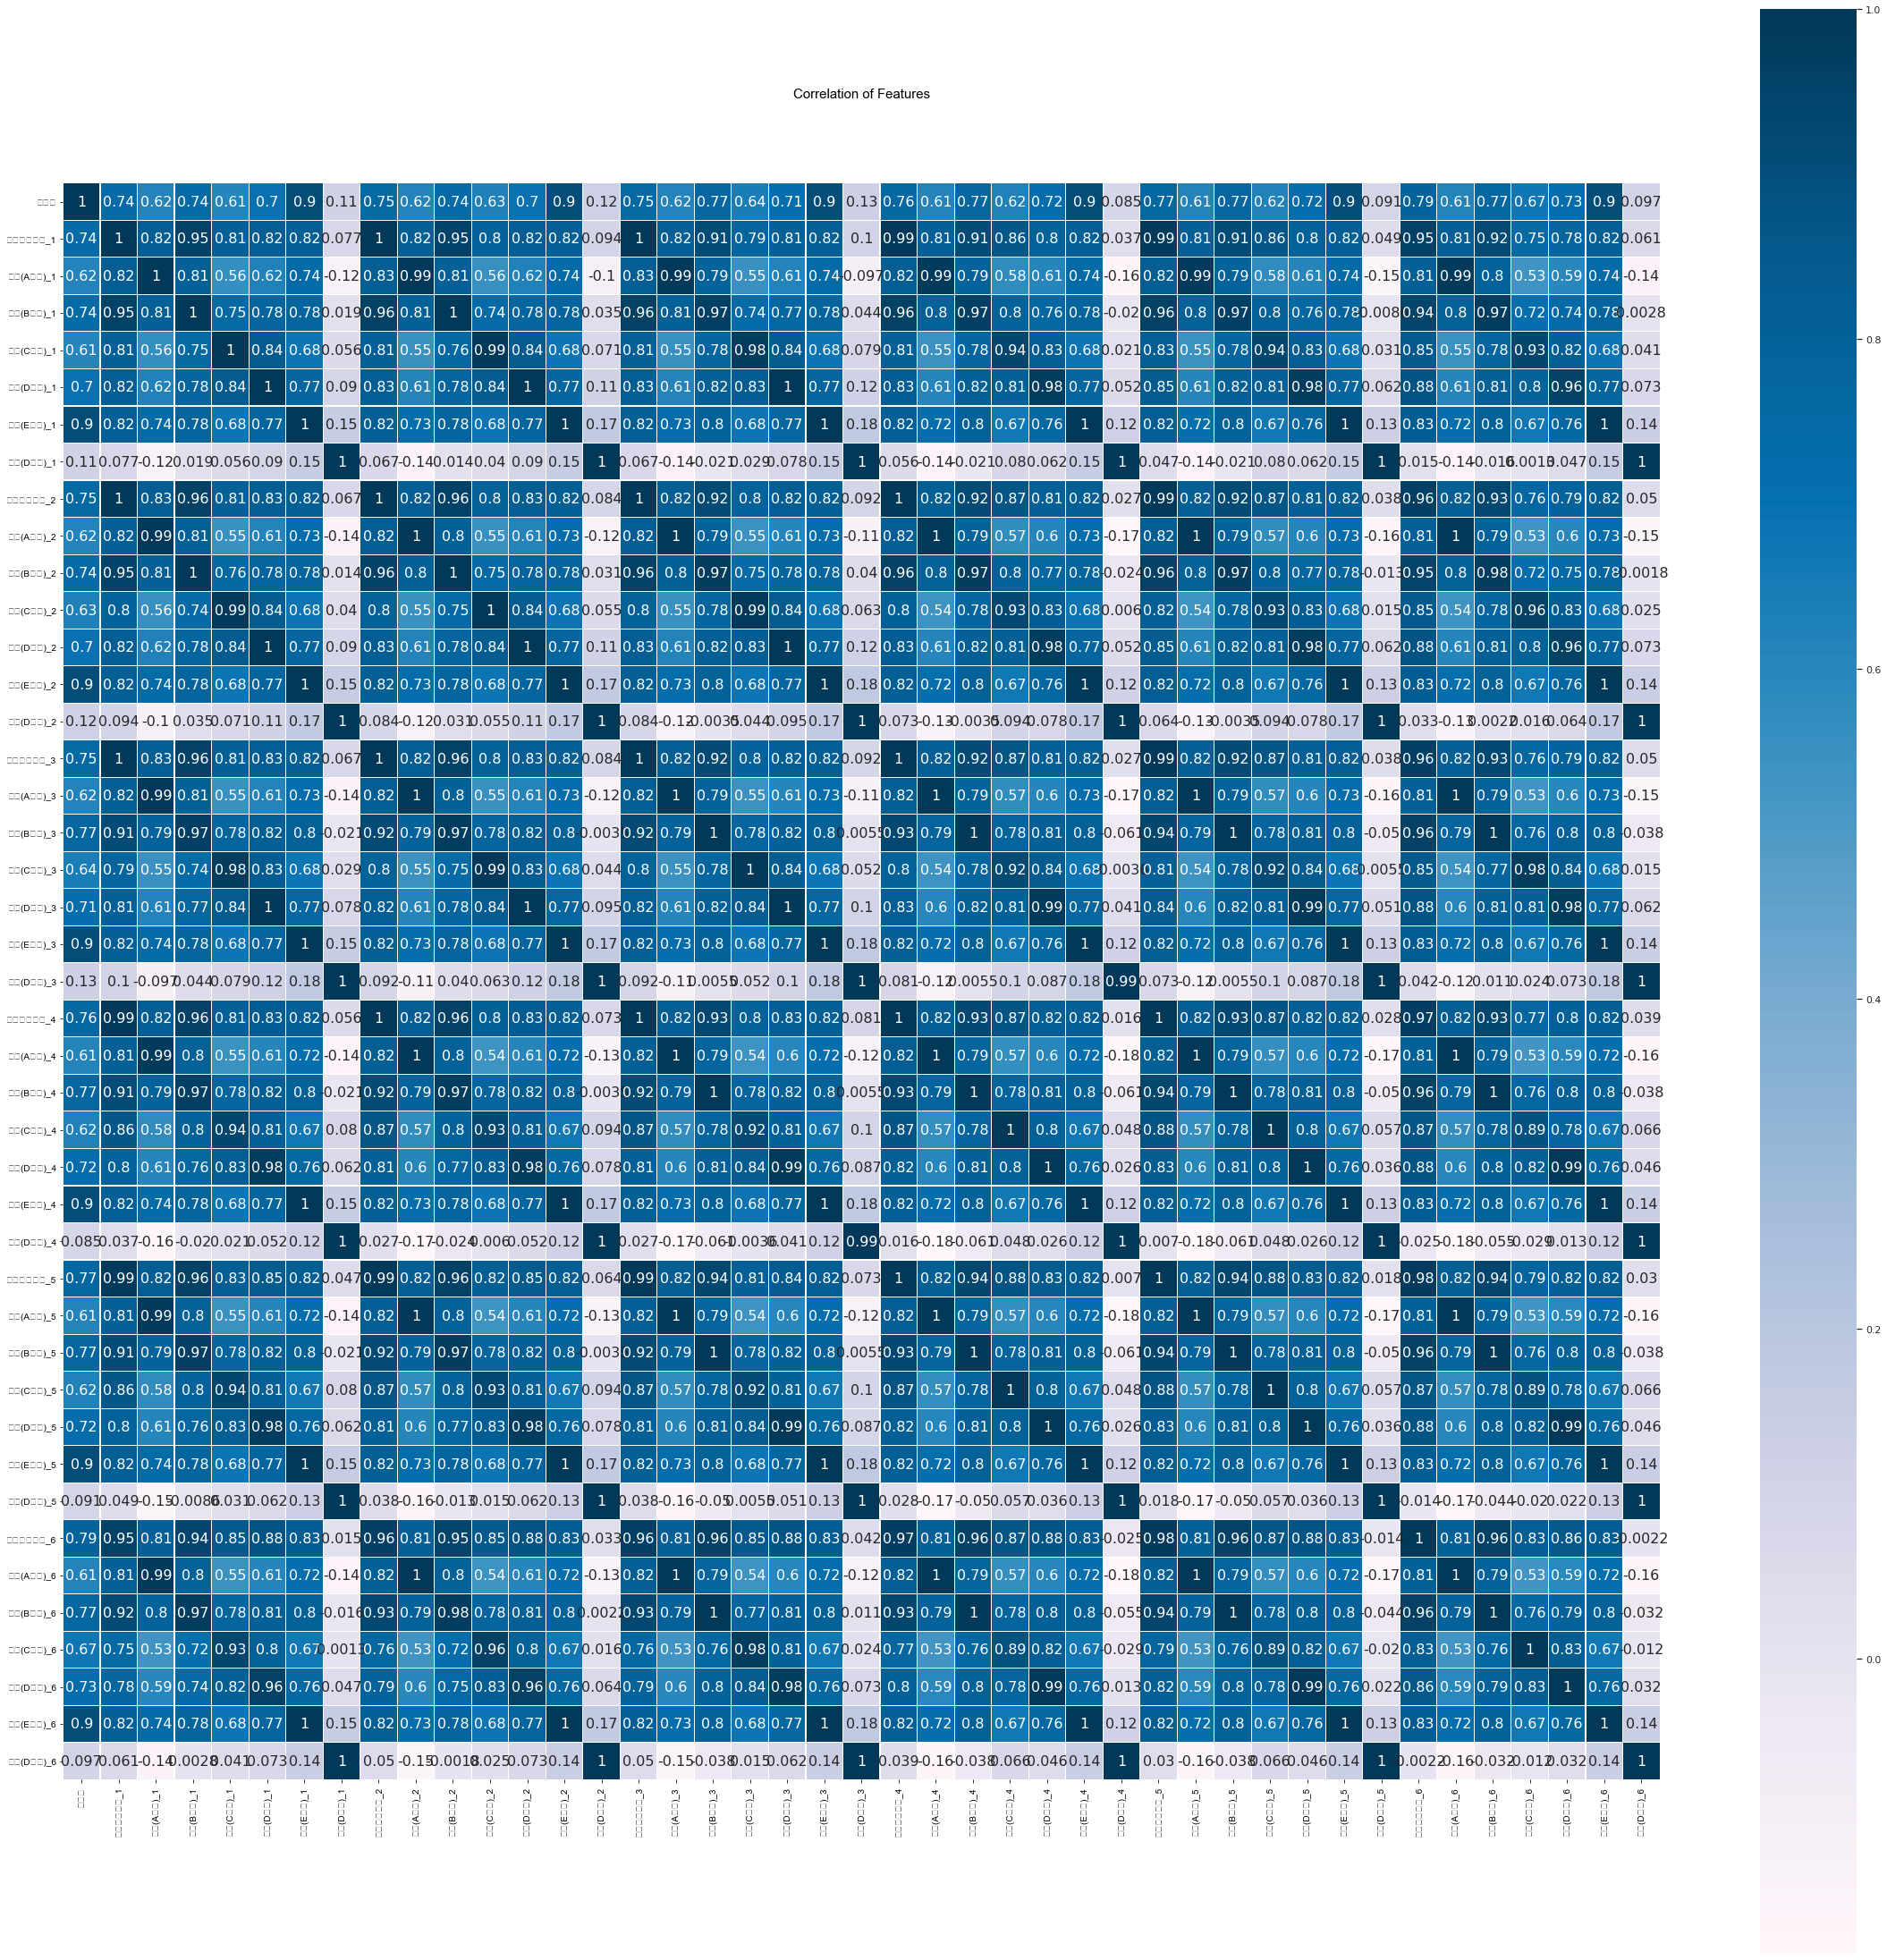

In [11]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(40, 40)) 
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


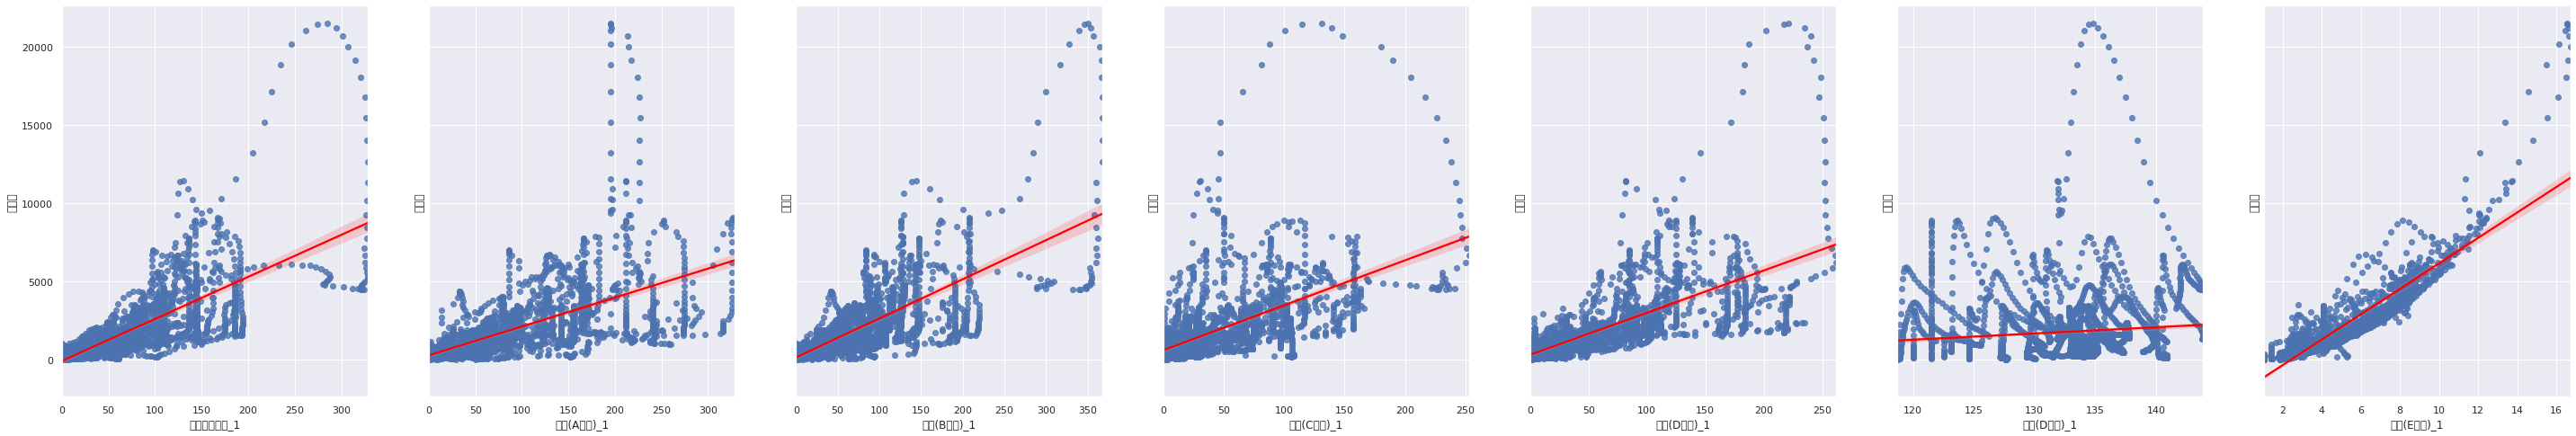

In [12]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols=7, sharey=True, figsize = (50,8))
sns.regplot(x=train['유역평균강수_1'], y=train['유입량'], ax=ax1, line_kws={'color':"red"})
sns.regplot(x=train['강우(A지역)_1'], y=train['유입량'], ax=ax2, line_kws={'color':"red"})
sns.regplot(x=train['강우(B지역)_1'], y=train['유입량'], ax=ax3, line_kws={'color':"red"})
sns.regplot(x=train['강우(C지역)_1'], y=train['유입량'], ax=ax4, line_kws={'color':"red"})
sns.regplot(x=train['강우(D지역)_1'], y=train['유입량'], ax=ax5, line_kws={'color':"red"})
sns.regplot(x=train['수위(D지역)_1'], y=train['유입량'], ax=ax6, line_kws={'color':"red"})
sns.regplot(x=train['수위(E지역)_1'], y=train['유입량'], ax=ax7, line_kws={'color':"red"})
#sns.lmplot(x="수위(D지역)_1", y="유입량", data = train, line_kws={'color':"red"})                                                                                                                                                                                                                                                                                

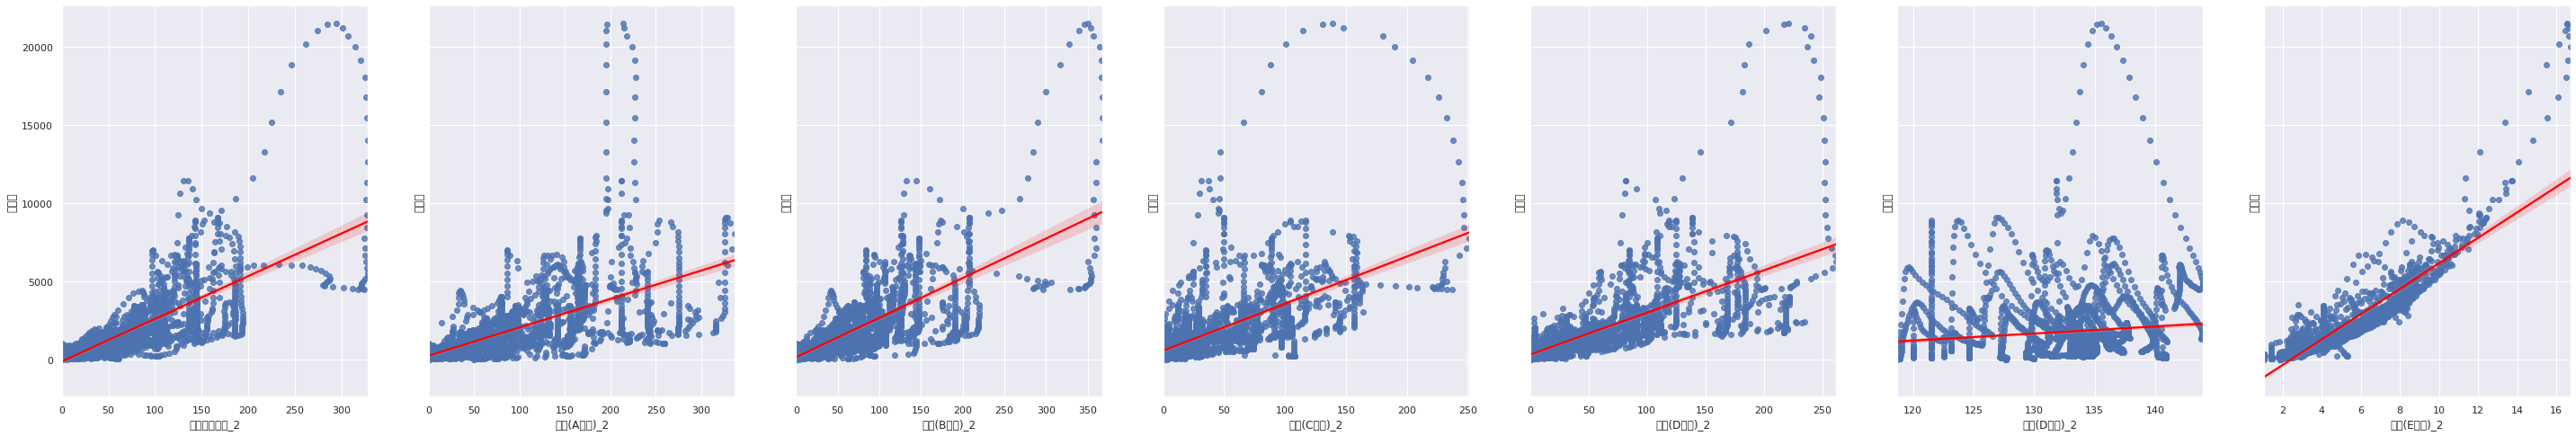

In [13]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols=7, sharey=True, figsize = (50,8))
sns.regplot(x=train['유역평균강수_2'], y=train['유입량'], ax=ax1, line_kws={'color':"red"})
sns.regplot(x=train['강우(A지역)_2'], y=train['유입량'], ax=ax2, line_kws={'color':"red"})
sns.regplot(x=train['강우(B지역)_2'], y=train['유입량'], ax=ax3, line_kws={'color':"red"})
sns.regplot(x=train['강우(C지역)_2'], y=train['유입량'], ax=ax4, line_kws={'color':"red"})
sns.regplot(x=train['강우(D지역)_2'], y=train['유입량'], ax=ax5, line_kws={'color':"red"})
sns.regplot(x=train['수위(D지역)_2'], y=train['유입량'], ax=ax6, line_kws={'color':"red"})
sns.regplot(x=train['수위(E지역)_2'], y=train['유입량'], ax=ax7, line_kws={'color':"red"})
#sns.lmplot(x="수위(D지역)_1", y="유입량", data = train, line_kws={'color':"red"})                                                                                                                                                                                                                                                                                

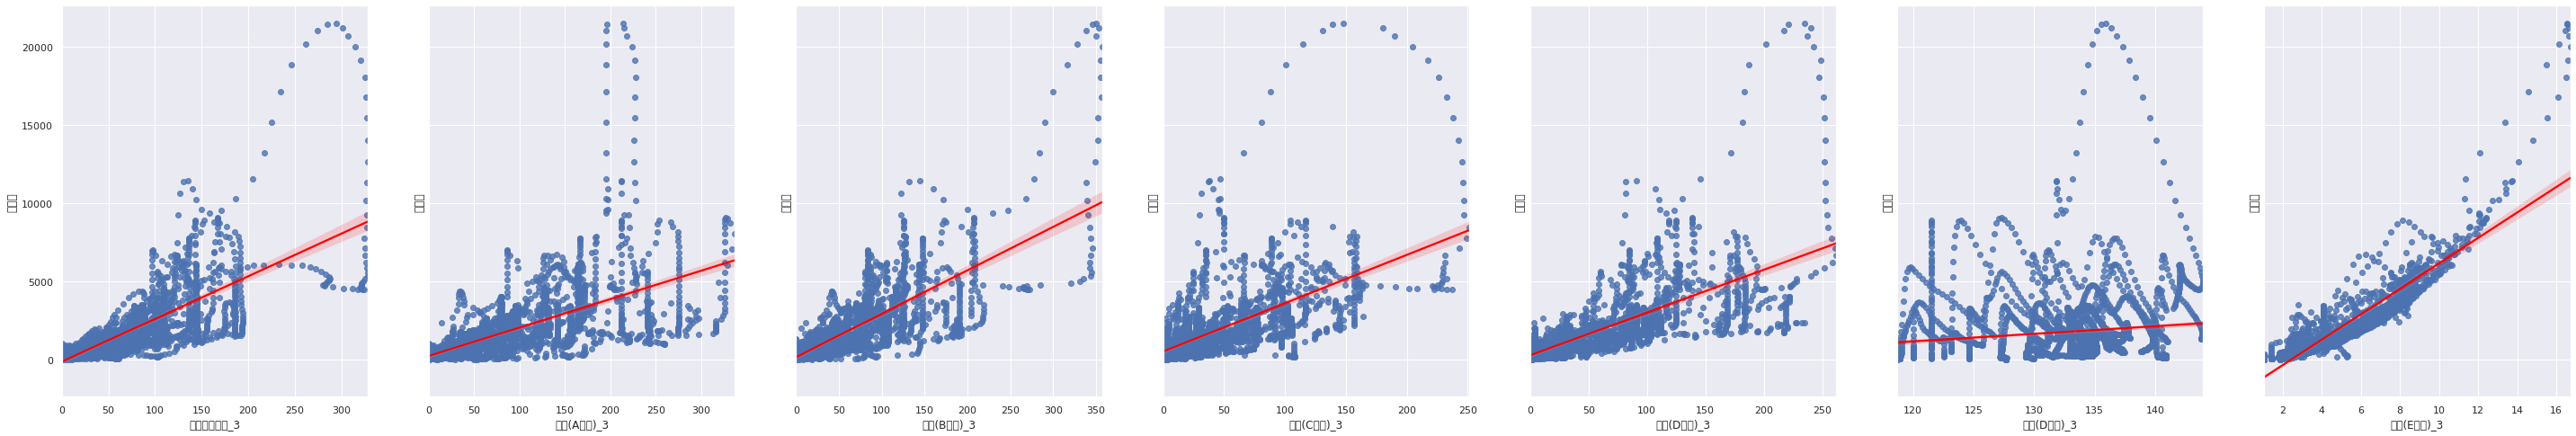

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols=7, sharey=True, figsize = (50,8))
sns.regplot(x=train['유역평균강수_3'], y=train['유입량'], ax=ax1, line_kws={'color':"red"})
sns.regplot(x=train['강우(A지역)_3'], y=train['유입량'], ax=ax2, line_kws={'color':"red"})
sns.regplot(x=train['강우(B지역)_3'], y=train['유입량'], ax=ax3, line_kws={'color':"red"})
sns.regplot(x=train['강우(C지역)_3'], y=train['유입량'], ax=ax4, line_kws={'color':"red"})
sns.regplot(x=train['강우(D지역)_3'], y=train['유입량'], ax=ax5, line_kws={'color':"red"})
sns.regplot(x=train['수위(D지역)_3'], y=train['유입량'], ax=ax6, line_kws={'color':"red"})
sns.regplot(x=train['수위(E지역)_3'], y=train['유입량'], ax=ax7, line_kws={'color':"red"})
#sns.lmplot(x="수위(D지역)_1", y="유입량", data = train, line_kws={'color':"red"})                                                                                                                                                                                                                                                                                

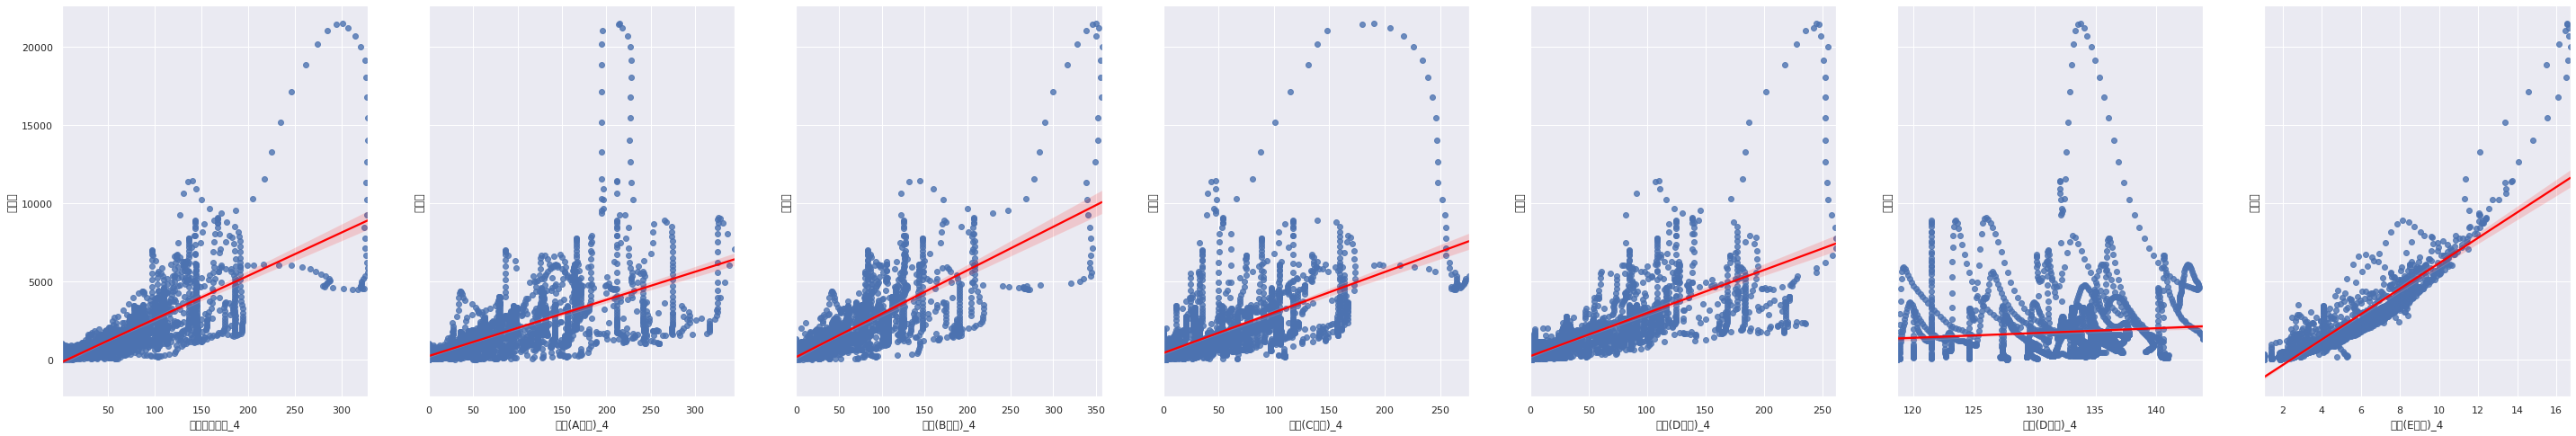

In [15]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols=7, sharey=True, figsize = (50,8))
sns.regplot(x=train['유역평균강수_4'], y=train['유입량'], ax=ax1, line_kws={'color':"red"})
sns.regplot(x=train['강우(A지역)_4'], y=train['유입량'], ax=ax2, line_kws={'color':"red"})
sns.regplot(x=train['강우(B지역)_4'], y=train['유입량'], ax=ax3, line_kws={'color':"red"})
sns.regplot(x=train['강우(C지역)_4'], y=train['유입량'], ax=ax4, line_kws={'color':"red"})
sns.regplot(x=train['강우(D지역)_4'], y=train['유입량'], ax=ax5, line_kws={'color':"red"})
sns.regplot(x=train['수위(D지역)_4'], y=train['유입량'], ax=ax6, line_kws={'color':"red"})
sns.regplot(x=train['수위(E지역)_4'], y=train['유입량'], ax=ax7, line_kws={'color':"red"})
#sns.lmplot(x="수위(D지역)_1", y="유입량", data = train, line_kws={'color':"red"})                                                                                                                                                                                                                                                                                

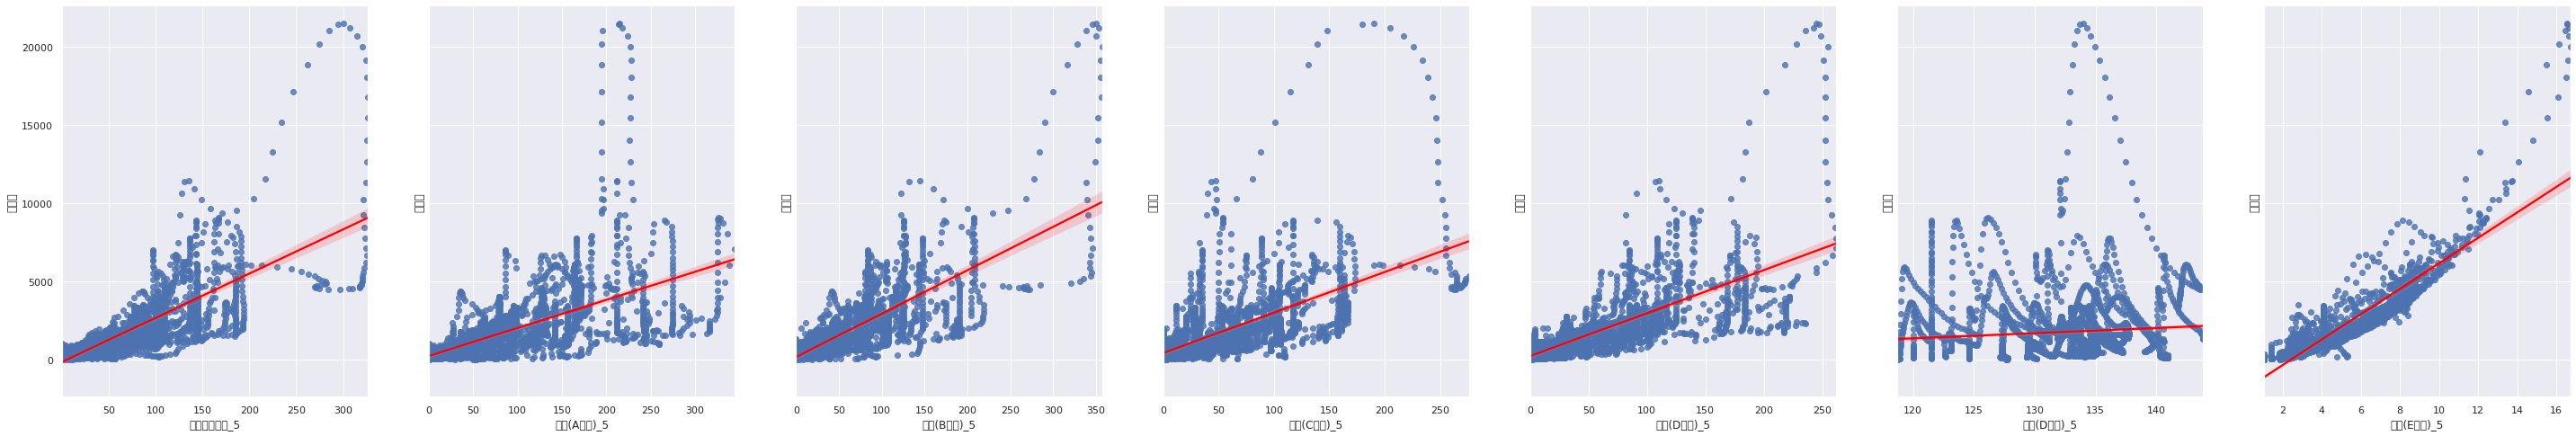

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols=7, sharey=True, figsize = (50,8))
sns.regplot(x=train['유역평균강수_5'], y=train['유입량'], ax=ax1, line_kws={'color':"red"})
sns.regplot(x=train['강우(A지역)_5'], y=train['유입량'], ax=ax2, line_kws={'color':"red"})
sns.regplot(x=train['강우(B지역)_5'], y=train['유입량'], ax=ax3, line_kws={'color':"red"})
sns.regplot(x=train['강우(C지역)_5'], y=train['유입량'], ax=ax4, line_kws={'color':"red"})
sns.regplot(x=train['강우(D지역)_5'], y=train['유입량'], ax=ax5, line_kws={'color':"red"})
sns.regplot(x=train['수위(D지역)_5'], y=train['유입량'], ax=ax6, line_kws={'color':"red"})
sns.regplot(x=train['수위(E지역)_5'], y=train['유입량'], ax=ax7, line_kws={'color':"red"})
#sns.lmplot(x="수위(D지역)_1", y="유입량", data = train, line_kws={'color':"red"})                                                                                                                                                                                                                                                                                

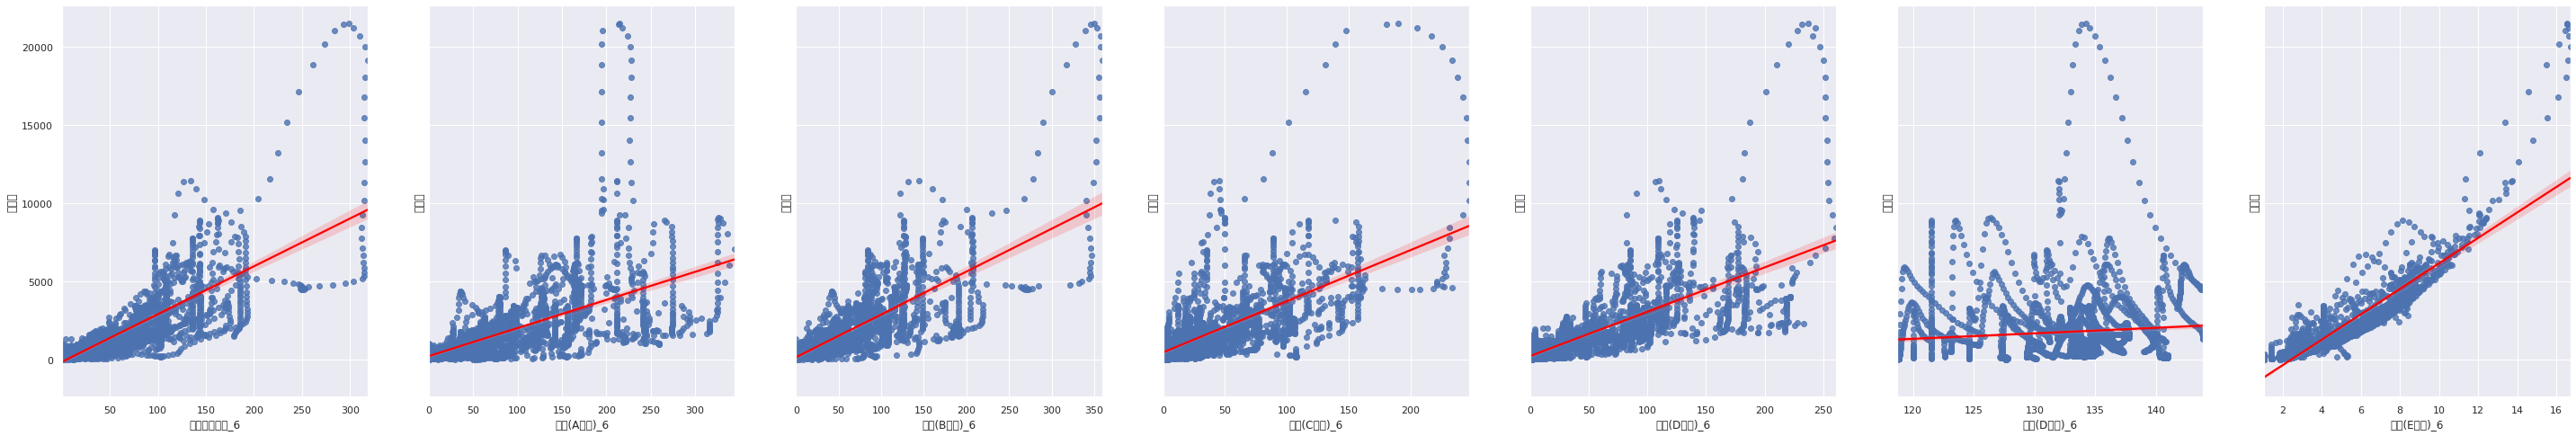

In [17]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols=7, sharey=True, figsize = (50,8))
sns.regplot(x=train['유역평균강수_6'], y=train['유입량'], ax=ax1, line_kws={'color':"red"})
sns.regplot(x=train['강우(A지역)_6'], y=train['유입량'], ax=ax2, line_kws={'color':"red"})
sns.regplot(x=train['강우(B지역)_6'], y=train['유입량'], ax=ax3, line_kws={'color':"red"})
sns.regplot(x=train['강우(C지역)_6'], y=train['유입량'], ax=ax4, line_kws={'color':"red"})
sns.regplot(x=train['강우(D지역)_6'], y=train['유입량'], ax=ax5, line_kws={'color':"red"})
sns.regplot(x=train['수위(D지역)_6'], y=train['유입량'], ax=ax6, line_kws={'color':"red"})
sns.regplot(x=train['수위(E지역)_6'], y=train['유입량'], ax=ax7, line_kws={'color':"red"})
#sns.lmplot(x="수위(D지역)_1", y="유입량", data = train, line_kws={'color':"red"})                                                                                                                                                                                                                                                                                

In [18]:
train['유역평균강수_mean'] = (train['유역평균강수_1'] + train['유역평균강수_2'] + train['유역평균강수_3'] + train['유역평균강수_4'] + train['유역평균강수_5'] + train['유역평균강수_6']) / 6
train['강우(A지역)_mean'] = (train['강우(A지역)_1'] + train['강우(A지역)_2'] + train['강우(A지역)_3'] + train['강우(A지역)_4'] + train['강우(A지역)_5'] + train['강우(A지역)_6']) / 6
train['강우(B지역)_mean'] = (train['강우(B지역)_1'] + train['강우(B지역)_2'] + train['강우(B지역)_3'] + train['강우(B지역)_4'] + train['강우(B지역)_5'] + train['강우(B지역)_6']) / 6
train['강우(C지역)_mean'] = (train['강우(C지역)_1'] + train['강우(C지역)_2'] + train['강우(C지역)_3'] + train['강우(C지역)_4'] + train['강우(C지역)_5'] + train['강우(C지역)_6']) / 6
train['강우(D지역)_mean'] = (train['강우(D지역)_1'] + train['강우(D지역)_2'] + train['강우(D지역)_3'] + train['강우(D지역)_4'] + train['강우(D지역)_5'] + train['강우(D지역)_6']) / 6
train['수위(E지역)_mean'] = (train['수위(E지역)_1'] + train['수위(E지역)_2'] + train['수위(E지역)_3'] + train['수위(E지역)_4'] + train['수위(E지역)_5'] + train['수위(E지역)_6']) / 6

In [19]:
test['유역평균강수_mean'] = (test['유역평균강수_1'] + test['유역평균강수_2'] + test['유역평균강수_3'] + test['유역평균강수_4'] + test['유역평균강수_5'] + test['유역평균강수_6']) / 6
test['강우(A지역)_mean'] = (test['강우(A지역)_1'] + test['강우(A지역)_2'] + test['강우(A지역)_3'] + test['강우(A지역)_4'] + test['강우(A지역)_5'] + test['강우(A지역)_6']) / 6
test['강우(B지역)_mean'] = (test['강우(B지역)_1'] + test['강우(B지역)_2'] + test['강우(B지역)_3'] + test['강우(B지역)_4'] + test['강우(B지역)_5'] + test['강우(B지역)_6']) / 6
test['강우(C지역)_mean'] = (test['강우(C지역)_1'] + test['강우(C지역)_2'] + test['강우(C지역)_3'] + test['강우(C지역)_4'] + test['강우(C지역)_5'] + test['강우(C지역)_6']) / 6
test['강우(D지역)_mean'] = (test['강우(D지역)_1'] + test['강우(D지역)_2'] + test['강우(D지역)_3'] + test['강우(D지역)_4'] + test['강우(D지역)_5'] + test['강우(D지역)_6']) / 6
test['수위(E지역)_mean'] = (test['수위(E지역)_1'] + test['수위(E지역)_2'] + test['수위(E지역)_3'] + test['수위(E지역)_4'] + test['수위(E지역)_5'] + test['수위(E지역)_6']) / 6

In [20]:
train.시간 = train.시간 - 1
test.시간 = test.시간 - 1

In [21]:
train['time'] = train.loc[:,'연'].astype('unicode')+ '-' +train.loc[:,'월'].astype('unicode') + '-' +train.loc[:,'일'].astype('unicode') + ' ' +train.loc[:,'시간'].astype('unicode') + ':00:00'
train['time']=pd.to_datetime(train['time'])

In [22]:
test['time'] = test.loc[:,'연'].astype('unicode')+ '-' +test.loc[:,'월'].astype('unicode') + '-' +test.loc[:,'일'].astype('unicode') + ' ' +test.loc[:,'시간'].astype('unicode') + ':00:00'
test['time']=pd.to_datetime(test['time'])

In [23]:
train_data = train.iloc[:,48:54]
test_data = test.iloc[:,48:54]
train_label = train.유입량

In [24]:
train_data2 = train.iloc[:,6:48]
test_data2 = test.iloc[:,6:48]
train_label2 = train.유입량

In [25]:
train_data

,유역평균강수_mean,강우(A지역)_mean,강우(B지역)_mean,강우(C지역)_mean,강우(D지역)_mean,수위(E지역)_mean
1,6.366667,7.000000,7.0,7.500000,8.000000,2.54
2,6.833333,7.000000,8.0,8.500000,9.000000,2.53
3,7.600000,7.000000,9.0,8.666667,9.500000,2.53
4,9.600000,8.000000,10.0,11.666667,11.333333,2.53
5,12.333333,10.166667,12.0,13.666667,13.166667,2.53
...,...,...,...,...,...,...
2887,8.071733,6.000000,0.0,1.000000,1.000000,3.03
2888,4.058300,2.000000,0.0,1.000000,1.000000,3.00
2889,3.002433,1.000000,0.0,1.000000,1.000000,2.98
2890,2.719167,1.000000,0.0,1.000000,1.000000,2.96


In [26]:
test_data

,유역평균강수_mean,강우(A지역)_mean,강우(B지역)_mean,강우(C지역)_mean,강우(D지역)_mean,수위(E지역)_mean
2892,7.681583,32.000000,0.0,0.500000,0.000000,1.93
2893,7.427667,20.500000,1.0,7.000000,4.000000,1.93
2894,10.552617,16.333333,5.0,9.666667,12.000000,1.92
2895,15.733667,13.833333,11.0,13.500000,17.833333,1.92
2896,22.355200,16.666667,25.0,17.166667,24.666667,1.92
...,...,...,...,...,...,...
3047,2.336117,1.000000,0.0,0.333333,0.000000,3.16
3048,2.320833,1.000000,0.0,0.333333,0.000000,3.15
3049,2.313317,1.000000,0.0,0.333333,0.000000,3.13
3050,2.287283,1.000000,0.0,0.333333,0.000000,3.11


In [27]:
train_data2

,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6
1,6.4000,7.0,7.0,7.0,8.0,2.54,122.56875,6.3000,7.0,7.0,7.0,8.0,2.54,122.541667,6.3000,7.0,7.0,7.0,8.0,2.54,122.550000,6.4000,7.0,7.0,8.0,8.0,2.54,122.675000,6.4000,7.0,7.0,8.0,8.0,2.54,122.660,6.4000,7.0,7.0,8.0,8.0,2.54,122.610
2,6.3000,7.0,8.0,7.0,8.0,2.53,122.56250,6.4000,7.0,8.0,7.0,8.0,2.53,122.550000,6.4000,7.0,8.0,7.0,8.0,2.53,122.558333,7.3000,7.0,8.0,10.0,10.0,2.53,122.667857,7.3000,7.0,8.0,10.0,10.0,2.53,122.648,7.3000,7.0,8.0,10.0,10.0,2.53,122.600
3,6.4000,7.0,9.0,7.0,8.0,2.53,122.55625,7.3000,7.0,9.0,7.0,8.0,2.53,122.558333,7.3000,7.0,9.0,8.0,8.0,2.53,122.566667,8.2000,7.0,9.0,10.0,11.0,2.53,122.660714,8.2000,7.0,9.0,10.0,11.0,2.53,122.636,8.2000,7.0,9.0,10.0,11.0,2.53,122.590
4,7.3000,7.0,10.0,7.0,8.0,2.53,122.55625,8.2000,7.0,10.0,8.0,8.0,2.53,122.566667,8.2000,7.0,10.0,10.0,10.0,2.53,122.575000,11.3000,9.0,10.0,15.0,14.0,2.53,122.653571,11.3000,9.0,10.0,15.0,14.0,2.53,122.620,11.3000,9.0,10.0,15.0,14.0,2.53,122.585
5,8.2000,7.0,12.0,8.0,10.0,2.53,122.55625,11.3000,9.0,12.0,10.0,10.0,2.53,122.575000,11.3000,9.0,12.0,10.0,11.0,2.53,122.575000,14.4000,12.0,12.0,18.0,16.0,2.53,122.639286,14.4000,12.0,12.0,18.0,16.0,2.53,122.604,14.4000,12.0,12.0,18.0,16.0,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,22.7836,6.0,0.0,1.0,1.0,3.03,137.16875,8.2586,6.0,0.0,1.0,1.0,3.03,137.200000,8.2586,6.0,0.0,1.0,1.0,3.03,137.200000,4.1089,6.0,0.0,1.0,1.0,3.03,137.050000,3.2841,6.0,0.0,1.0,1.0,3.03,137.088,1.7366,6.0,0.0,1.0,1.0,3.03,137.130
2888,8.2586,2.0,0.0,1.0,1.0,3.00,137.18125,4.1089,2.0,0.0,1.0,1.0,3.00,137.200000,4.1089,2.0,0.0,1.0,1.0,3.00,137.200000,3.3854,2.0,0.0,1.0,1.0,3.00,137.067857,2.7514,2.0,0.0,1.0,1.0,3.00,137.104,1.7366,2.0,0.0,1.0,1.0,3.00,137.145
2889,4.1089,1.0,0.0,1.0,1.0,2.98,137.18750,3.3854,1.0,0.0,1.0,1.0,2.98,137.200000,3.3854,1.0,0.0,1.0,1.0,2.98,137.200000,3.2841,1.0,0.0,1.0,1.0,2.98,137.085714,2.1142,1.0,0.0,1.0,1.0,2.98,137.120,1.7366,1.0,0.0,1.0,1.0,2.98,137.155
2890,3.3854,1.0,0.0,1.0,1.0,2.96,137.19375,3.2841,1.0,0.0,1.0,1.0,2.96,137.200000,3.2841,1.0,0.0,1.0,1.0,2.96,137.208333,2.7514,1.0,0.0,1.0,1.0,2.96,137.103571,1.8734,1.0,0.0,1.0,1.0,2.96,137.136,1.7366,1.0,0.0,1.0,1.0,2.96,137.165


In [28]:
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMRegressor

In [35]:
random.seed(42)
lgb_models={}
for fold in range(1):
    print(f'===================================={fold+1}============================================')
    lgb = LGBMRegressor(n_estimators=100000)
    lgb.fit(train_data, train_label, 
            eval_set=[(train_data, train_label)], 
            early_stopping_rounds=30,
           verbose=10000,)
    lgb_models[fold]=lgb
    print(f'================================================================================\n\n')

====================================1============================================
Training until validation scores don't improve for 30 rounds
[10000]	training's l2: 1472.9
[20000]	training's l2: 1461.76
[30000]	training's l2: 1461.61
[40000]	training's l2: 1461.6
[50000]	training's l2: 1461.6
[60000]	training's l2: 1461.6
[70000]	training's l2: 1461.6
[80000]	training's l2: 1461.6
[90000]	training's l2: 1461.6
[100000]	training's l2: 1461.6
Did not meet early stopping. Best iteration is:
[99111]	training's l2: 1461.6




In [30]:
random.seed(42)
lgb_models={}
for fold in range(1):
    print(f'===================================={fold+1}============================================')
    lgb = LGBMRegressor(n_estimators=100000)
    lgb.fit(train_data2, train_label2, 
            eval_set=[(train_data2, train_label2)], 
            early_stopping_rounds=30,
           verbose=10000,)
    lgb_models[fold]=lgb
    print(f'================================================================================\n\n')

====================================1============================================
Training until validation scores don't improve for 30 rounds
[10000]	training's l2: 2.13123
[20000]	training's l2: 1.9544
[30000]	training's l2: 1.95386
[40000]	training's l2: 1.95386
[50000]	training's l2: 1.95386
[60000]	training's l2: 1.95386
[70000]	training's l2: 1.95386
[80000]	training's l2: 1.95386
[90000]	training's l2: 1.95386
[100000]	training's l2: 1.95386
Did not meet early stopping. Best iteration is:
[73092]	training's l2: 1.95386




In [36]:
result = lgb.predict(train_data)

In [33]:
result2 = lgb.predict(train_data2)

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(train_label, result)

1.916360877979463

In [38]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(train_label, result)
np.sqrt(MSE)

38.230906734969174

In [34]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(train_label2, result2)
np.sqrt(MSE)

1.3978061717629087

정리
====

1. 상관관계 체크시 각 데이터 집단이 아닌 각 데이터집단 별 같은 레이블링된 지역(예: A지역, B지역 ...)의 상관관계가 매우 높음(대부분이 1의 상관관계를 가짐 최저 0.89)
2. regplot으로 유입량과 각 데이터별 상관관계 체크시 heatmap과 마찬가지로 각 지역이 집단에 상관없이 상당히 유사한 분포를 가진다는 것을 알 수 있음.
3. regplot 확인시 일부 데이터들에서 작선형태가 나타나는 현상을 볼 수 있으며 이를 제거하는 것이 성능향상에 도움을 줄 수 있을 것으로 예상됨.
4. 각 데이터와 유입량관의 상관관계 체크시 각 데이터에서 특이한 분포를 가지는 데이터들이 존재하는데 이를 제거하면 성능 향상이 이루어질 것으로 예상됨.

추가 진행 계획
====
1. 데이터에서 아웃라이어로 생각되는 데이터 제거하여 학습진행
2. 데이터 집단 통계를 바탕으로 하여 데이터 차원 줄이기

성능
=====

1. RAW 데이터에 대한 예측 RMSE = 1.39780
2. 같은 항목에 대한 평균으로 줄인경우 RMSE = 38.23090